Creating Pyspark session

In [2]:
from pyspark.sql import SparkSession
SparkSession = SparkSession.builder.appName("Challenge M4 - DataScience").getOrCreate()

Reading Prouni Data

In [6]:
prouniData = SparkSession.read.parquet("prouni-2019-2015.parquet")
prouniData.show(truncate=False)

+-------------------+---------------------+------------------------------------------+--------------+-----------------------+-------------------------------------+----------------------+-----------------------+-----------------------+--------------------------+-----+------------------------------+-------------------------+---------------------------+---------+
|ANO_CONCESSAO_BOLSA|CODIGO_EMEC_IES_BOLSA|NOME_IES_BOLSA                            |TIPO_BOLSA    |MODALIDADE_ENSINO_BOLSA|NOME_CURSO_BOLSA                     |NOME_TURNO_CURSO_BOLSA|SEXO_BENEFICIARIO_BOLSA|RACA_BENEFICIARIO_BOLSA|DT_NASCIMENTO_BENEFICIARIO|IDADE|BENEFICIARIO_DEFICIENTE_FISICO|REGIAO_BENEFICIARIO_BOLSA|SIGLA_UF_BENEFICIARIO_BOLSA|QTD_BOLSA|
+-------------------+---------------------+------------------------------------------+--------------+-----------------------+-------------------------------------+----------------------+-----------------------+-----------------------+--------------------------+-----+-------

Verify null columns

In [7]:
from pyspark.sql.functions import isnan, when, count
prouniData.select([count(when(isnan(c), c)).alias(c) for c in prouniData.columns]).show()

AnalysisException: cannot resolve 'isnan(DT_NASCIMENTO_BENEFICIARIO)' due to data type mismatch: argument 1 requires (double or float) type, however, 'DT_NASCIMENTO_BENEFICIARIO' is of date type.;
'Aggregate [count(CASE WHEN isnan(cast(ANO_CONCESSAO_BOLSA#125 as double)) THEN ANO_CONCESSAO_BOLSA END) AS ANO_CONCESSAO_BOLSA#218L, count(CASE WHEN isnan(cast(CODIGO_EMEC_IES_BOLSA#126 as double)) THEN CODIGO_EMEC_IES_BOLSA END) AS CODIGO_EMEC_IES_BOLSA#220L, count(CASE WHEN isnan(cast(NOME_IES_BOLSA#127 as double)) THEN NOME_IES_BOLSA END) AS NOME_IES_BOLSA#222L, count(CASE WHEN isnan(cast(TIPO_BOLSA#128 as double)) THEN TIPO_BOLSA END) AS TIPO_BOLSA#224L, count(CASE WHEN isnan(cast(MODALIDADE_ENSINO_BOLSA#129 as double)) THEN MODALIDADE_ENSINO_BOLSA END) AS MODALIDADE_ENSINO_BOLSA#226L, count(CASE WHEN isnan(cast(NOME_CURSO_BOLSA#130 as double)) THEN NOME_CURSO_BOLSA END) AS NOME_CURSO_BOLSA#228L, count(CASE WHEN isnan(cast(NOME_TURNO_CURSO_BOLSA#131 as double)) THEN NOME_TURNO_CURSO_BOLSA END) AS NOME_TURNO_CURSO_BOLSA#230L, count(CASE WHEN isnan(cast(SEXO_BENEFICIARIO_BOLSA#132 as double)) THEN SEXO_BENEFICIARIO_BOLSA END) AS SEXO_BENEFICIARIO_BOLSA#232L, count(CASE WHEN isnan(cast(RACA_BENEFICIARIO_BOLSA#133 as double)) THEN RACA_BENEFICIARIO_BOLSA END) AS RACA_BENEFICIARIO_BOLSA#234L, count(CASE WHEN isnan(DT_NASCIMENTO_BENEFICIARIO#134) THEN DT_NASCIMENTO_BENEFICIARIO END) AS DT_NASCIMENTO_BENEFICIARIO#236, count(CASE WHEN isnan(cast(IDADE#135 as double)) THEN IDADE END) AS IDADE#238L, count(CASE WHEN isnan(cast(BENEFICIARIO_DEFICIENTE_FISICO#136 as double)) THEN BENEFICIARIO_DEFICIENTE_FISICO END) AS BENEFICIARIO_DEFICIENTE_FISICO#240L, count(CASE WHEN isnan(cast(REGIAO_BENEFICIARIO_BOLSA#137 as double)) THEN REGIAO_BENEFICIARIO_BOLSA END) AS REGIAO_BENEFICIARIO_BOLSA#242L, count(CASE WHEN isnan(cast(SIGLA_UF_BENEFICIARIO_BOLSA#138 as double)) THEN SIGLA_UF_BENEFICIARIO_BOLSA END) AS SIGLA_UF_BENEFICIARIO_BOLSA#244L, count(CASE WHEN isnan(cast(QTD_BOLSA#139 as double)) THEN QTD_BOLSA END) AS QTD_BOLSA#246L]
+- Relation [ANO_CONCESSAO_BOLSA#125,CODIGO_EMEC_IES_BOLSA#126,NOME_IES_BOLSA#127,TIPO_BOLSA#128,MODALIDADE_ENSINO_BOLSA#129,NOME_CURSO_BOLSA#130,NOME_TURNO_CURSO_BOLSA#131,SEXO_BENEFICIARIO_BOLSA#132,RACA_BENEFICIARIO_BOLSA#133,DT_NASCIMENTO_BENEFICIARIO#134,IDADE#135,BENEFICIARIO_DEFICIENTE_FISICO#136,REGIAO_BENEFICIARIO_BOLSA#137,SIGLA_UF_BENEFICIARIO_BOLSA#138,QTD_BOLSA#139] parquet


Top universities in 2019

In [9]:
from pyspark.sql.functions import col, desc
universitiesScholarships2019 = prouniData.filter(col("ANO_CONCESSAO_BOLSA").contains("2019")).select('NOME_IES_BOLSA').groupBy('NOME_IES_BOLSA')
universitiesScholarships2019.count().sort(desc("count")).show(truncate=False)

+------------------------------------------------+-----+
|NOME_IES_BOLSA                                  |count|
+------------------------------------------------+-----+
|UNIVERSIDADE PAULISTA                           |36618|
|CENTRO UNIVERSITÁRIO INTERNACIONAL              |8598 |
|UNIVERSIDADE ESTÁCIO DE SÁ                      |7009 |
|CENTRO UNIVERSITÁRIO LEONARDO DA VINCI          |5344 |
|UNIVERSIDADE PITÁGORAS UNOPAR                   |4864 |
|UNIVERSIDADE NOVE DE JULHO                      |4446 |
|PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS|4342 |
|UNIVERSIDADE CEUMA                              |3267 |
|UNIVERSIDADE ANHANGUERA                         |2866 |
|CENTRO UNIVERSITÁRIO DE MARINGÁ - UNICESUMAR    |2810 |
|PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ      |2416 |
|CENTRO UNIVERSITÁRIO CLARETIANO                 |1949 |
|CENTRO UNIVERSITÁRIO ESTÁCIO DE RIBEIRÃO PRETO  |1650 |
|UNIVERSIDADE SANTO AMARO                        |1633 |
|CENTRO UNIVERSITÁRIO EURO-AMER

Top remote courses in 2019

In [12]:
from pyspark.sql.functions import col, desc, sum
courses2019 = prouniData.filter(col("ANO_CONCESSAO_BOLSA").contains("2019"))\
                        .filter(col("MODALIDADE_ENSINO_BOLSA").contains("EAD"))\
                        .filter(col("TIPO_BOLSA").contains("BOLSA PARCIAL 50%"))\
                        .select("NOME_CURSO_BOLSA")\
                        .groupBy("NOME_CURSO_BOLSA")\
                        .count()\
                        .sort(desc("count"))

courses2019.agg(sum("count")).show()
courses2019.show(truncate=False)

+----------+
|sum(count)|
+----------+
|      6272|
+----------+

+----------------------------------------+-----+
|NOME_CURSO_BOLSA                        |count|
+----------------------------------------+-----+
|Pedagogia                               |730  |
|Administração                           |595  |
|Educação Física                         |484  |
|Ciências Contábeis                      |446  |
|Gestão De Recursos Humanos              |277  |
|Processos Gerenciais                    |184  |
|Logística                               |182  |
|Gestão Pública                          |176  |
|Pedagogia(Ead)                          |175  |
|Análise E Desenvolvimento De Sistemas   |173  |
|Engenharia Elétrica                     |158  |
|Serviço Social                          |154  |
|Engenharia De Produção                  |148  |
|História                                |148  |
|Gestão De Serviços Jurídicos E Notariais|143  |
|Gestão Da Produção Industrial           |142  |
|Ge

Plot graf to see variation of race by year

+-------------------+-----------------------+------+
|ANO_CONCESSAO_BOLSA|RACA_BENEFICIARIO_BOLSA| count|
+-------------------+-----------------------+------+
|               2019|               Indígena|   197|
|               2019|                Amarela|  3817|
|               2018|                 Branca| 93254|
|               2018|                Amarela|  4165|
|               2018|               Indígena|   204|
|               2017|                  Preta| 30741|
|               2017|                 Branca| 94472|
|               2017|                Amarela|  4004|
|               2019|          Não Informada|     5|
|               2019|                  Parda|105705|
|               2019|                  Preta| 29456|
|               2018|          Não Informada|    22|
|               2017|          Não Informada|    13|
|               2018|                  Preta| 31239|
|               2019|                 Branca| 86375|
|               2018|                  Parda|1

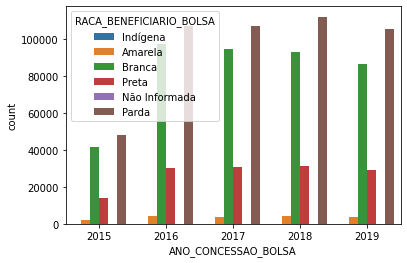

In [11]:
racebyYear = prouniData.select([c for c in prouniData.columns if c in ['ANO_CONCESSAO_BOLSA','RACA_BENEFICIARIO_BOLSA']])
racebyYearGrouped = racebyYear.groupBy('ANO_CONCESSAO_BOLSA','RACA_BENEFICIARIO_BOLSA').count()
racebyYearGrouped.show()
racebyYearGroupedPandas = racebyYearGrouped.toPandas()

import seaborn as sns
g = sns.barplot(data=racebyYearGroupedPandas, x='ANO_CONCESSAO_BOLSA', y='count', hue='RACA_BENEFICIARIO_BOLSA')